## Introduction to Unsupervised Learning

Unsupervised machine learning refers to the category of machine learning techniques where models are trained on a dataset without labels. Unsupervised learning is generally use to discover patterns in data and reduce high-dimensional data to fewer dimensions. Here's how unsupervised learning fits into the landscape of machine learning algorithms([source](https://medium.datadriveninvestor.com/machine-learning-in-10-minutes-354d83e5922e)):

<img src="https://miro.medium.com/max/842/1*tlQwBmbL6RkuuFq8OPJofw.png" width="640">

Here are the topics in machine learning that we're studying in this course ([source](https://vas3k.com/blog/machine_learning/)): 

<img src="https://i.imgur.com/VbVFAsg.png" width="640">

## Clustering 

Clustering is the process of grouping objects from a dataset such that objects in the same group (called a cluster) are more similar (in some sense) to each other than to those in other groups ([Wikipedia](https://en.wikipedia.org/wiki/Cluster_analysis)). Scikit-learn offers several clustering algorithms. You can learn more about them here: https://scikit-learn.org/stable/modules/clustering.html

Here is a visual representation of clustering:

<img src="https://i.imgur.com/VXPgw6H.png" width="400">


Here are some real-world applications of clustering:

* Customer segmentation 
* Product recommendation
* Feature engineering
* Anomaly/fraud detection
* Taxonomy creation

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

iris_df = sns.load_dataset('iris')

iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


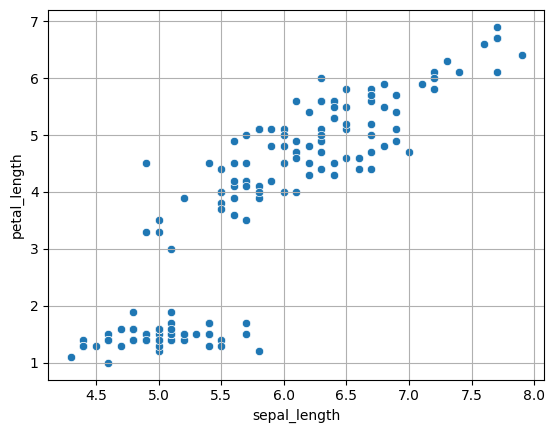

In [2]:
sns.scatterplot(data=iris_df, x='sepal_length', y='petal_length')
plt.grid()

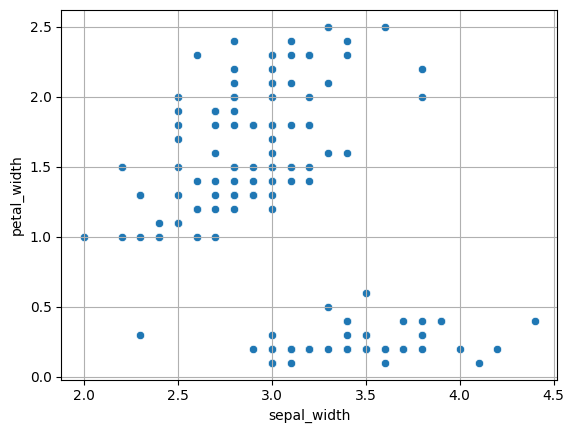

In [3]:
sns.scatterplot(data=iris_df, x='sepal_width', y='petal_width')
plt.grid()

In [4]:
numeric_cols = iris_df.select_dtypes(include='number').columns
numeric_cols

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

In [5]:
X = iris_df[numeric_cols]

### K Means Clustering

The K-means algorithm attempts to classify objects into a pre-determined number of clusters by finding optimal central points (called centroids) for each cluster. Each object is classifed as belonging the cluster represented by the closest centroid.

<img src="https://miro.medium.com/max/1400/1*rw8IUza1dbffBhiA4i0GNQ.png" width="640">

## Steps to accomplish K-means Algorithm: 

1. Pick a random K values as the cluster centers(centroids)
2. Classify each object into nearest centroids
3. For each cluster of classified objects compute the centroid(1D - mean)
4. Now Reclassify each objects  using centers as clusters
5. Calculate the total Varience of the clusters
6. If even after completing the steps the centroids of clusters are unbalanced, Repeat steps from 1 to 6 again till the lowest total variance reached <br><br>
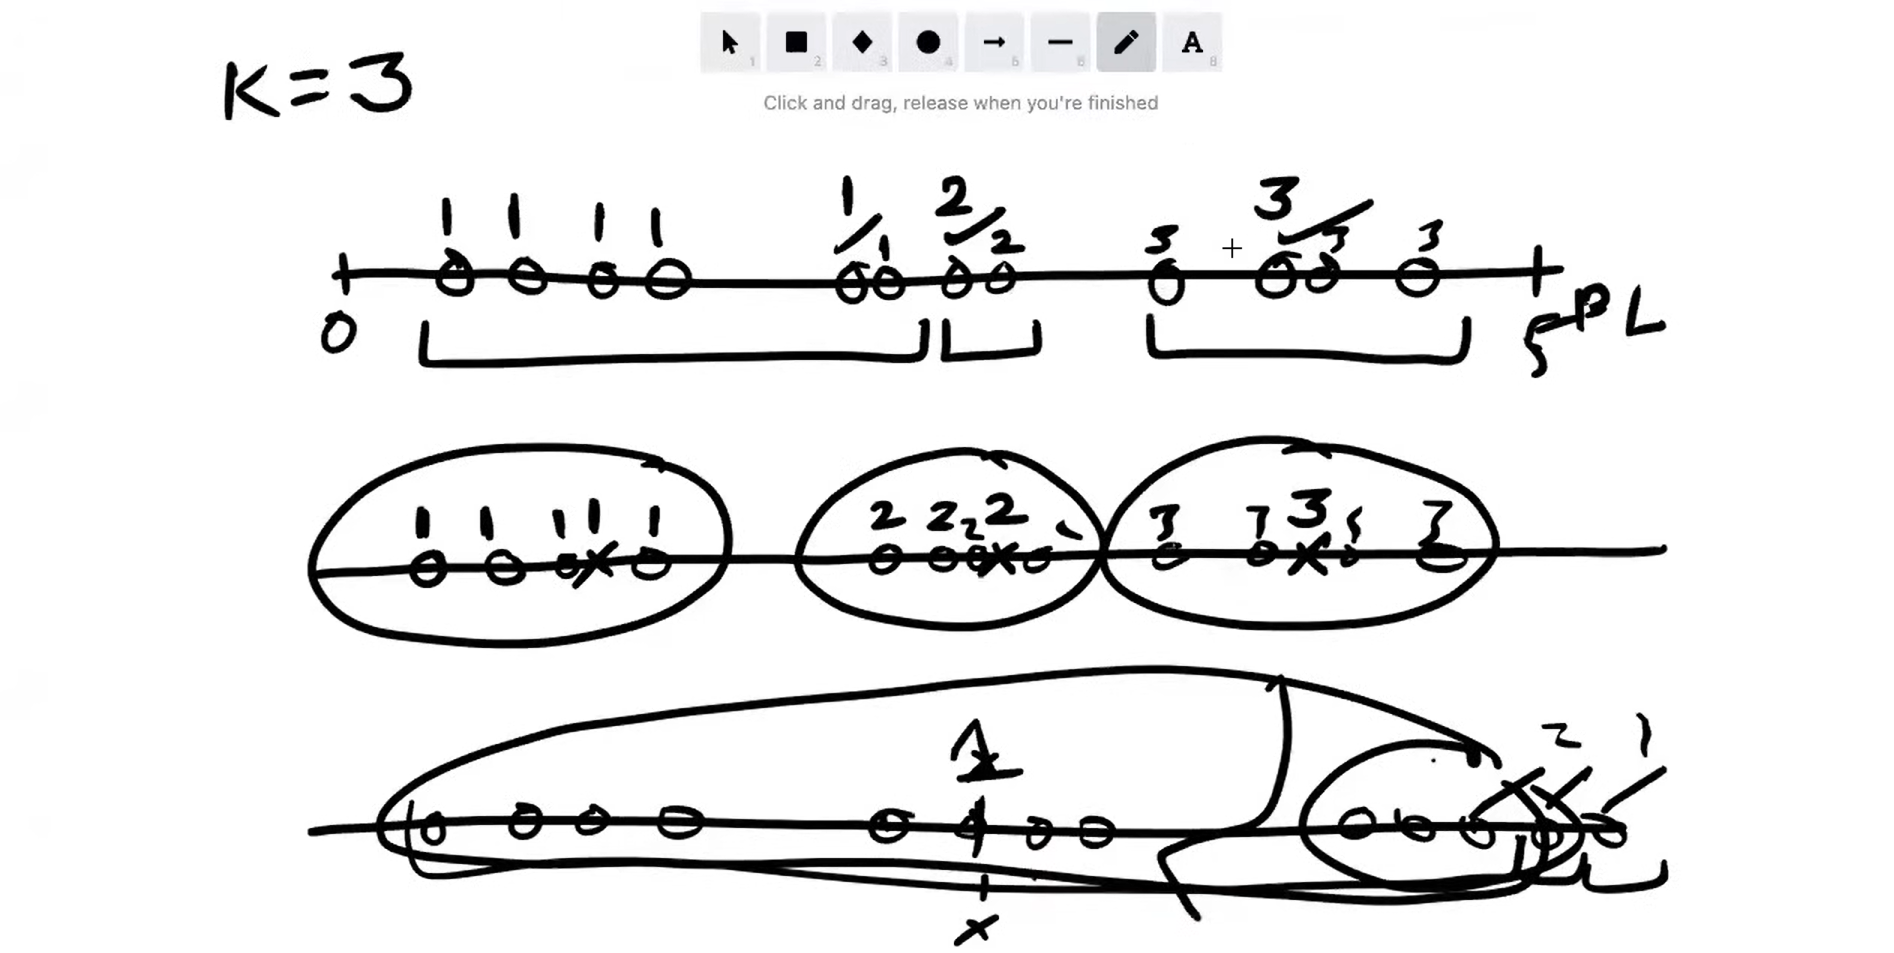

Varience is the Total SPREAD 

In [6]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3, random_state=42)
model.fit(X)


,n_clusters,3
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,42
,copy_x,True
,algorithm,'lloyd'


In [7]:
model.cluster_centers_

array([[6.85384615, 3.07692308, 5.71538462, 2.05384615],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [5.88360656, 2.74098361, 4.38852459, 1.43442623]])

In [8]:
preds = model.predict(X)
preds

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

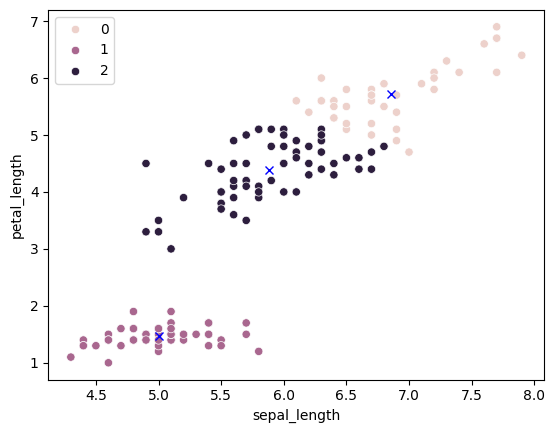

In [9]:
sns.scatterplot(data=X, x='sepal_length', y='petal_length', hue=preds)
centers_x, centers_y = model.cluster_centers_[:, 0], model.cluster_centers_[:, 2]
plt.plot(centers_x, centers_y, 'xb')

We can check the "goodness" of the fit by looking at `model.inertia_`, which contains the sum of squared distances of samples to their closest cluster center. Lower the inertia, better the fit.

In [10]:
model.inertia_

78.85566582597728

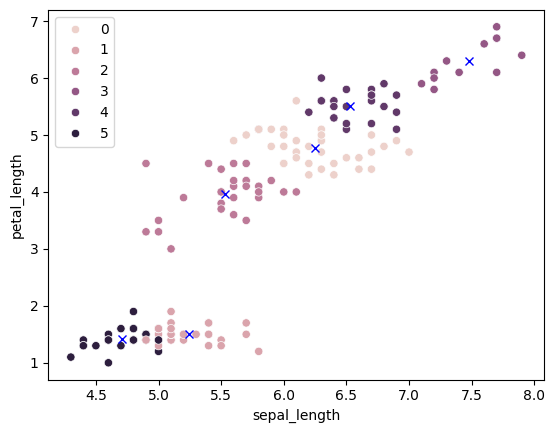

In [11]:
model = KMeans(n_clusters=6, random_state=42).fit(X)
preds =  model.predict(X)
sns.scatterplot(data=X, x='sepal_length', y='petal_length', hue=preds)
centers_x, centers_y = model.cluster_centers_[:, 0], model.cluster_centers_[:, 2]
plt.plot(centers_x, centers_y, 'xb')

In [12]:
model.inertia_

39.066035353535355

Text(0, 0.5, 'Variance')

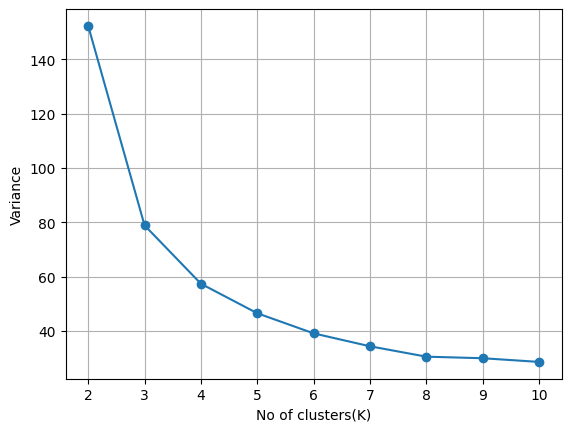

In [13]:
options = range(2, 11, 1)
inertias = []

for i in options:
    model = KMeans(n_clusters=i, random_state=42).fit(X)
    inertias.append(model.inertia_)

plt.plot(options, inertias, '-o')
plt.xlabel('No of clusters(K)')
plt.grid()
plt.ylabel('Variance')

## Choosing No. of Clusters

We choose the number of clusters where the variance doesn't change much. Here we choose 6, as after it not much changes occur

## Mini Batch KMeans

In [14]:
from sklearn.cluster import MiniBatchKMeans

mini_model = MiniBatchKMeans(n_clusters=6, random_state=42, batch_size=123).fit(X)
mini_preds = mini_model.predict(X)

mini_model.inertia_

41.77928782685942

## DBSCAN - Density-Based spacial clustering of applications with Noise

Classifies the data based on density of the points, PARAMETERS are:
1. Epsilon
2. min_sample
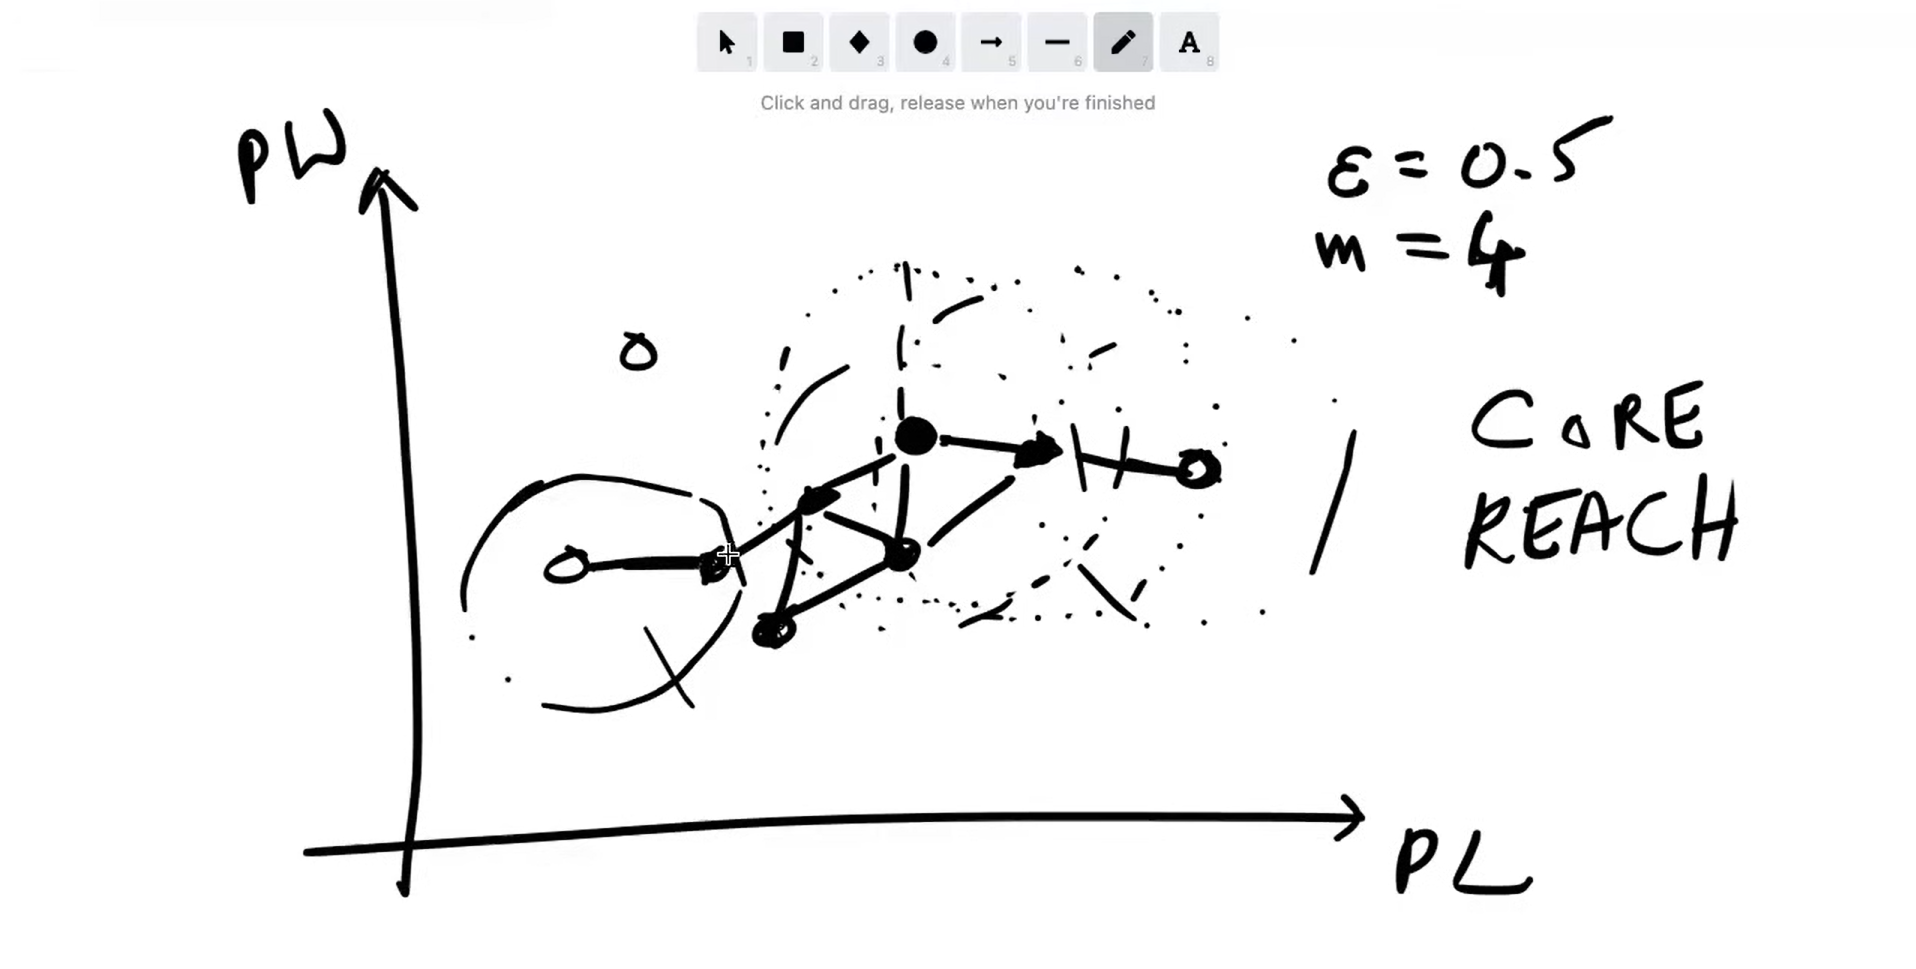

In [15]:
from sklearn.cluster import DBSCAN


In [16]:
model = DBSCAN(eps=1.1, min_samples=4)
model.fit(X)
model.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

<Axes: xlabel='sepal_length', ylabel='petal_length'>

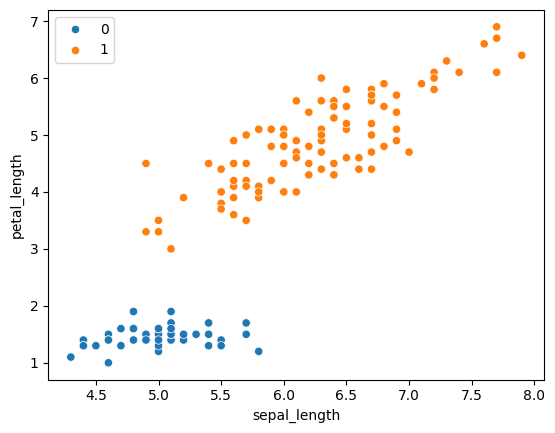

In [17]:
sns.scatterplot(data=X, x='sepal_length', y='petal_length', hue=model.labels_)

## Difference between DBSCAN and KMeans

Here's how the results of DBSCAN and K Means differ:

<img src="https://miro.medium.com/max/1339/0*xu3GYMsWu9QiKNOo.png" width="640">

### Hierarchical Clustering

Hierarchical clustering, as the name suggests, creates a hierarchy or a tree of clusters.

<img src="https://dashee87.github.io/images/hierarch.gif" width="640">

While there are several approaches to hierarchical clustering, the most common approach works as follows:

1. Mark each point in the dataset as a cluster.
2. Pick the two closest cluster centers without a parent and combine them into a new cluster. 
3. The new cluster is the parent cluster of the two clusters, and its center is the mean of all the points in the cluster.
3. Repeat steps 2 and 3 till there's just one cluster left.

Watch this video for a visual explanation of hierarchical clustering: https://www.youtube.com/watch?v=7xHsRkOdVwo

In [18]:
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(n_clusters = 3, linkage='ward')
model.fit(X)
model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

<Axes: xlabel='sepal_length', ylabel='petal_length'>

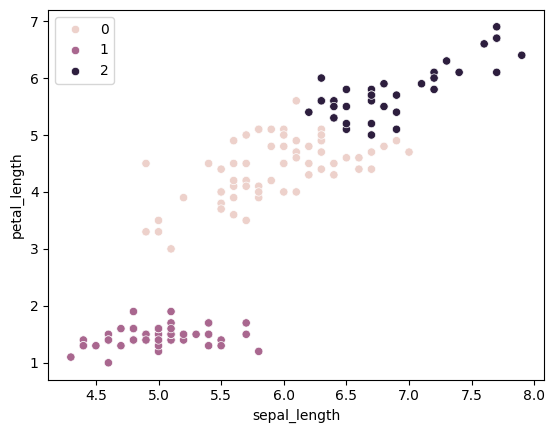

In [19]:
sns.scatterplot(data=X, x='sepal_length', y='petal_length', hue=model.labels_)

## Dimensionality Reduction and Manifold Learning

In machine learning problems, we often encounter datasets with a very large number of dimensions (features or columns). Dimensionality reduction techniques are used to reduce the number of dimensions or features within the data to a manageable or convenient number. 


Applications of dimensionality reduction:

* Reducing size of data without loss of information
* Training machine learning models efficiently
* Visualizing high-dimensional data in 2/3 dimensions

### Principal Component Analysis (PCA)

Principal component is a dimensionality reduction technique that uses linear projections of data to reduce their dimensions, while attempting to maximize the variance of data in the projection. Watch this video to learn how PCA works: https://www.youtube.com/watch?v=FgakZw6K1QQ

Here's an example of PCA to reduce 2D data to 1D:

<img src="https://i.imgur.com/ZJ7utlo.png" width="480">

Let's apply Principal Component Analysis to the Iris dataset.

In [20]:
from sklearn.decomposition import PCA

In [21]:
pca = PCA(n_components=2)
pca.fit(iris_df[numeric_cols])

,n_components,2
,copy,True
,whiten,False
,svd_solver,'auto'
,tol,0.0
,iterated_power,'auto'
,n_oversamples,10
,power_iteration_normalizer,'auto'
,random_state,None


In [22]:
transformed = pca.transform(iris_df[numeric_cols]) # Gives data in 2d instead of 4d 

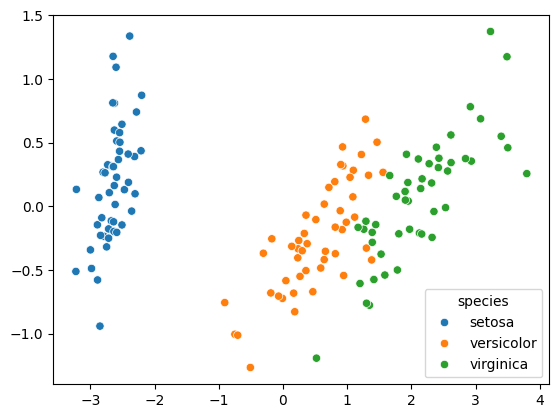

In [23]:
sns.scatterplot(x=transformed[:,0], y=transformed[:,1], hue=iris_df['species']);

In [24]:
pca.components_

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [ 0.65658877,  0.73016143, -0.17337266, -0.07548102]])

> **EXERCISE**: Apply Principal Component Analysis to a large high-dimensional dataset and train a machine learning model using the low-dimensional results. Observe the changes in the loss and training time for different numbers of target dimensions.

### t-Distributed Stochastic Neighbor Embedding (t-SNE)

Manifold learning is an approach to non-linear dimensionality reduction. Algorithms for this task are based on the idea that the dimensionality of many data sets is only artificially high. Scikit-learn provides many algorithms for manifold learning: https://scikit-learn.org/stable/modules/manifold.html . A commonly-used manifold learning technique is t-Distributed Stochastic Neighbor Embedding or t-SNE, used to visualize high dimensional data in one, two or three dimensions. 

Here's a visual representation of t-SNE applied to visualize 2 dimensional data in 1 dimension:

<img src="https://i.imgur.com/rVMAaix.png" width="360">


Here's a visual representation of t-SNE applied to the MNIST dataset, which contains 28px x 28px images of handrwritten digits 0 to 9, a reduction from 784 dimensions to 2 dimensions ([source](https://colah.github.io/posts/2014-10-Visualizing-MNIST/)):

Here's a video explaning how t-SNE works: https://www.youtube.com/watch?v=NEaUSP4YerM

In [25]:
from sklearn.manifold import TSNE

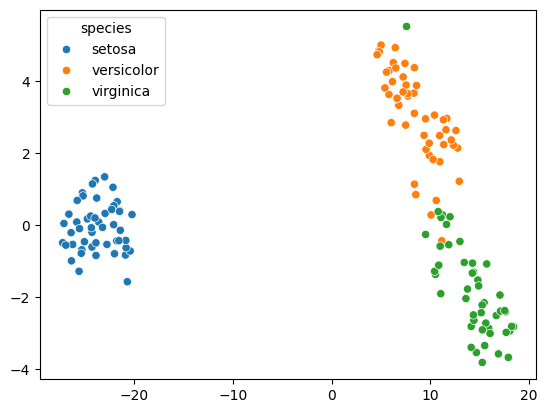

In [26]:
tsne = TSNE(n_components=2)
transformed = tsne.fit_transform(iris_df[numeric_cols])
sns.scatterplot(x=transformed[:,0], y=transformed[:,1], hue=iris_df['species']);


> **EXERCISE**: Use t-SNE to visualize the [MNIST handwritten digits dataset](https://www.kaggle.com/oddrationale/mnist-in-csv).